In [61]:
# loading packages
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization and missing values
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
import missingno as msno # missing values
%matplotlib inline

# stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error, r2_score

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
seed = 123

In [62]:
filename = "dataset_v1.csv"
df = pd.read_csv(filename)
df_1 = df.dropna(subset=['host_neighbourhood'])
#                        'beds', 'review_scores_accuracy',
#                        'review_scores_cleanliness', 'review_scores_checkin',
#                        'review_scores_location', 'review_scores_value'])
df_1.isnull().sum()

id                                 0
host_is_superhost                  0
property_type                      0
room_type                          0
price                              0
guests_included                    0
host_picture_url                   0
host_name                          0
neighbourhood                      0
host_neighbourhood                 0
zipcode                            0
latitude                           0
longitude                          0
name                               3
first_review                       3
last_review                        3
picture_url                        0
listing_url                        0
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
reviews_per_month                  3
review_scores_rating               3
review_scores_accuracy             6
review_scores_cleanliness          5
review_scores_checkin             22
review_scores_communication        8
r

In [63]:
df_1.columns

Index(['id', 'host_is_superhost', 'property_type', 'room_type', 'price',
       'guests_included', 'host_picture_url', 'host_name', 'neighbourhood',
       'host_neighbourhood', 'zipcode', 'latitude', 'longitude', 'name',
       'first_review', 'last_review', 'picture_url', 'listing_url',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'reviews_per_month', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'availability_365', 'beds', 'bed_type', 'bedrooms', 'bathrooms',
       'accommodates', 'TV', 'Wifi', 'Free street parking', 'Kitchen',
       'Shampoo', 'Air conditioning', 'Hair dryer', 'Self check-in',
       'room_type_1', 'property_type_1', 'bed_type_1', 'street'],
      dtype='object')

In [64]:
df_1.dtypes

id                                  int64
host_is_superhost                   int64
property_type                      object
room_type                          object
price                               int64
guests_included                     int64
host_picture_url                   object
host_name                          object
neighbourhood                      object
host_neighbourhood                 object
zipcode                           float64
latitude                          float64
longitude                         float64
name                               object
first_review                       object
last_review                        object
picture_url                        object
listing_url                        object
minimum_nights                      int64
maximum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
review_scores_rating              float64
review_scores_accuracy            

In [65]:
# first glance at the data itself
print('Total size:', df_1.shape)
df_1.head(5).append(df_1.tail(5))

Total size: (15738, 48)


id  host_is_superhost property_type        room_type  price  \
0       1893048                  0     Apartment  Entire home/apt    220   
1       4550529                  0     Apartment  Entire home/apt    165   
2      24396600                  0     Apartment  Entire home/apt    199   
5      26200642                  0     Apartment  Entire home/apt    144   
7       9260085                  0         House  Entire home/apt    779   
22639  29221824                  0     Apartment  Entire home/apt     93   
22640  29285779                  0     Apartment  Entire home/apt    150   
22641  29287605                  0     Apartment  Entire home/apt    180   
22642  29355286                  0     Apartment  Entire home/apt    190   
22643  29442558                  0     Apartment  Entire home/apt    195   

       guests_included                                   host_picture_url  \
0                    4  https://a0.muscache.com/im/users/9839303/profi...   
1                    1  https://a0.muscache.com/im/users/23437202/prof...   
2                    2  https://a0.muscache.com/im/users/11278162/prof...   
5                    3  https://a0.muscache.com/im/pictures/user/98d11...   
7                    1  https://a0.muscache.com/im/users/10441624/prof...   
22639                1  https://a0.muscache.com/im/pictures/user/9c312...   
22640                1  https://a0.muscache.com/im/pictures/user/2293c...   
22641                4  https://a0.muscache.com/im/pictures/user/2293c...   
22642                4  https://a0.muscache.com/im/pictures/user/fbd50...   
22643                1  https://a0.muscache.com/im/pictures/user/2293c...   

      host_name neighbourhood         host_neighbourhood  ...  \
0         Sonal      Waverley                North Bondi  ...   
1          Jane      Randwick                     Coogee  ...   
2          John        Sydney                    Pyrmont  ...   
5         Jesse        Sydney  Central Business District  ...   
7        Angela    Canada Bay       Annandale/Leichhardt  ...   
22639        千业      Randwick                 Camperdown  ...   
22640     Bella        Sydney                    Zetland  ...   
22641     Bella        Sydney                    Zetland  ...   
22642     Jerry        Sydney                    Zetland  ...   
22643     Bella        Sydney                    Zetland  ...   

       Free street parking  Kitchen  Shampoo Air conditioning Hair dryer  \
0                        0        1        0                0          0   
1                        0        1        0                0          0   
2                        1        1        1                0          1   
5                        0        1        1                1          1   
7                        0        1        1                1          1   
22639                    1        1        1                1          0   
22640                    0        1        1                0          1   
22641                    0        1        1                1          1   
22642                    0        1        1                1          1   
22643                    0        1        1                1          1   

      Self check-in room_type_1 property_type_1  bed_type_1             street  
0                 0           1               2           0        Bondi Beach  
1                 0           1               2           0            Coogee   
2                 1           1               2           0  • Darling harbour  
5                 1           1               2           0  • Darling harbour  
7                 0           1               1           0         Abbotsford  
22639             0           1               2           0            Zetland  
22640             0           1               2           0            Zetland  
22641             1           1               2           0            Zetland  
22642             0           1               

In [66]:
df.describe()

id  host_is_superhost         price  guests_included  \
count  2.264400e+04       22644.000000  22644.000000     22644.000000   
mean   1.654931e+07           0.180224    183.871003         1.670332   
std    7.896209e+06           0.384383    220.624767         1.378827   
min    1.235100e+04           0.000000      0.000000         1.000000   
25%    9.912084e+06           0.000000     80.000000         1.000000   
50%    1.760188e+07           0.000000    130.000000         1.000000   
75%    2.248453e+07           0.000000    199.000000         2.000000   
max    2.944681e+07           1.000000  10001.000000        16.000000   

            zipcode      latitude     longitude  minimum_nights  \
count  22643.000000  22644.000000  22644.000000    22644.000000   
mean    2068.411915    -33.862651    151.202299        4.224828   
std      105.094110      0.072402      0.084207       14.035419   
min     1711.000000    -34.135212    150.644964        1.000000   
25%     2021.000000    -33.897176    151.178823        1.000000   
50%     2035.000000    -33.881575    151.214223        2.000000   
75%     2095.000000    -33.833833    151.259378        4.000000   
max     8185.000000    -33.389728    151.339811      700.000000   

       maximum_nights  number_of_reviews  ...          Wifi  \
count    22644.000000       22644.000000  ...  22644.000000   
mean       682.165033          19.381028  ...      0.940205   
std        546.949293          34.229915  ...      0.237112   
min          1.000000           0.000000  ...      0.000000   
25%         30.000000           2.000000  ...      1.000000   
50%       1125.000000           6.000000  ...      1.000000   
75%       1125.000000          20.000000  ...      1.000000   
max      10000.000000         493.000000  ...      1.000000   

       Free street parking       Kitchen       Shampoo  Air conditioning  \
count         22644.000000  22644.000000  22644.000000      22644.000000   
mean              0.306792      0.949567      0.728979          0.450936   
std               0.461173      0.218841      0.444497          0.497598   
min               0.000000      0.000000      0.000000          0.000000   
25%               0.000000      1.000000      0.000000          0.000000   
50%               0.000000      1.000000      1.000000          0.000000   
75%               1.000000      1.000000      1.000000          1.000000   
max               1.000000      1.000000      1.000000          1.000000   

         Hair dryer  Self check-in   room_type_1  property_type_1  \
count  22644.000000   22644.000000  22644.000000     22644.000000   
mean       0.710078       0.274731      0.677751         2.319113   
std        0.453736       0.446388      0.491124         2.639778   
min        0.000000       0.000000      0.000000         0.000000   
25%        0.000000       0.000000      0.000000         1.000000   
50%        1.000000       0.000000      1.000000         2.000000   
75%        1.000000       1.000000      1.000000         2.000000   
max        1.000000       1.000000      2.000000        35.000000   

         bed_type_1  
count  22644.000000  
mean       0.011350  
std        0.160334  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000  

[8 rows x 35 columns]

## The table above can tell some important things:
- **1**: we have different units of data(int, float, object)
- **2**: some datapoints are missing
- **3**: some variables' distributions are skewed.


## Missing values
- in this section, the main task is treating missing values.

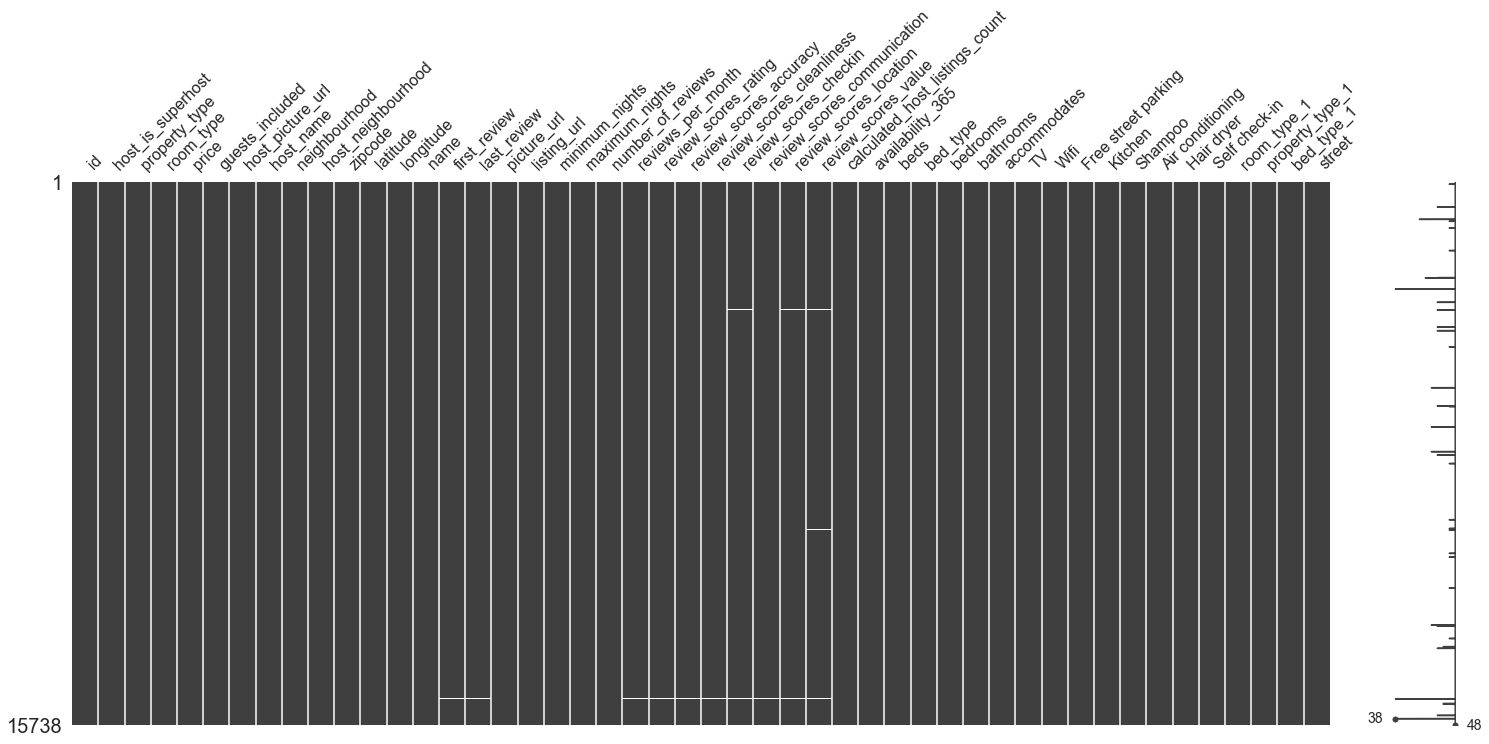

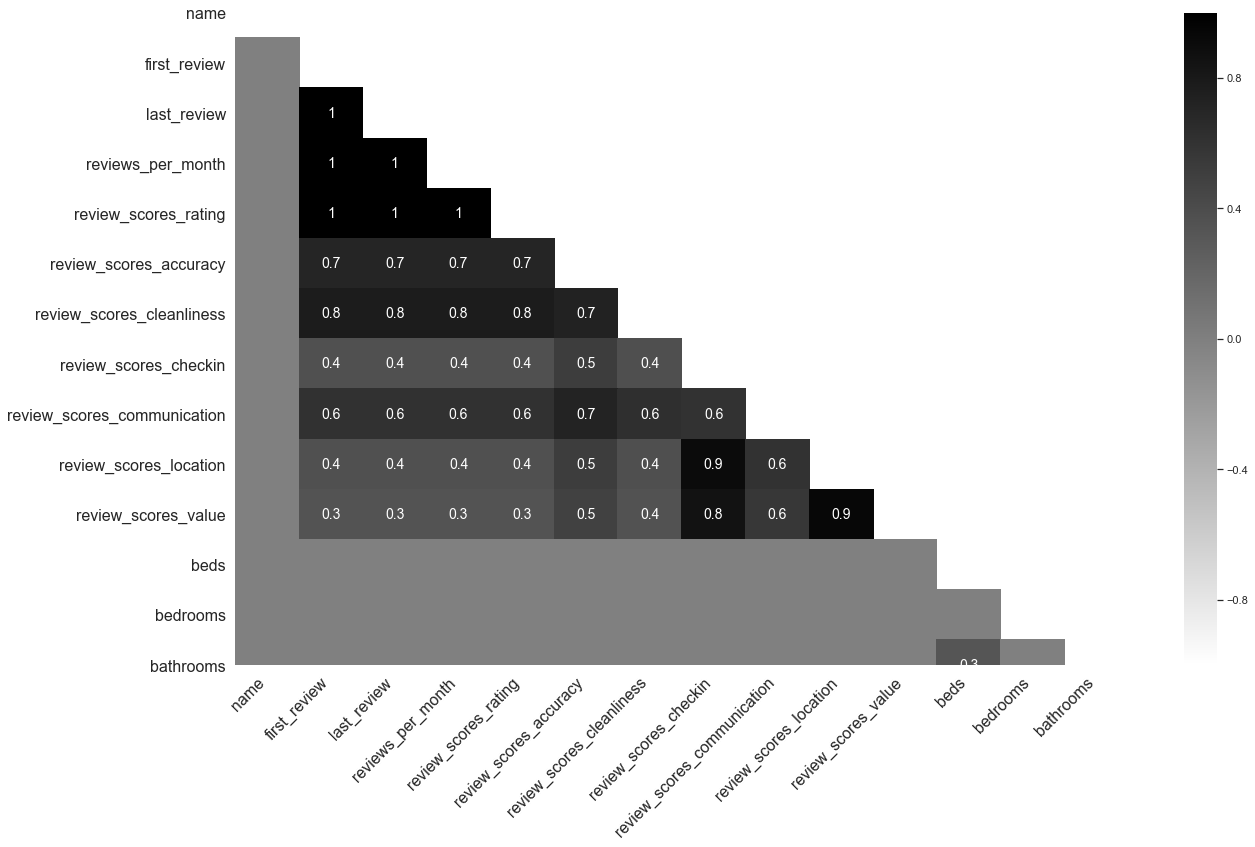

In [67]:
seed = 123
sns.set(style = "ticks")

msno.matrix(df_1)
msno.heatmap(df_1, cmap = 'binary')

More or less clean dataset with occasional missing values. 
- thought on dealing with the missing values is replaced by their grouped medians

In [68]:
# missing values in reviews_score_value
df_1[pd.isnull(df_1['review_scores_rating'])].head()

id  host_is_superhost property_type        room_type  price  \
4078   19722495                  0     Apartment  Entire home/apt    174   
21471  19642060                  0     Apartment  Entire home/apt     96   
22367  16315518                  0         House     Private room     50   

       guests_included                                   host_picture_url  \
4078                 1  https://a0.muscache.com/im/pictures/a2144527-a...   
21471                2  https://a0.muscache.com/im/pictures/d3113e4d-7...   
22367                1  https://a0.muscache.com/im/pictures/01eca8d2-d...   

      host_name neighbourhood host_neighbourhood  ...  Free street parking  \
4078      Rosio      Waverley        Bondi Beach  ...                    0   
21471    Dougie        Sydney           Waterloo  ...                    0   
22367  Baptiste        Sydney      Woolloomooloo  ...                    0   

       Kitchen  Shampoo Air conditioning Hair dryer Self check-in room_type_1  \
4078         0        0                1          1             0           1   
21471        1        1                1          1             0           1   
22367        1        0                1          0             0           0   

      property_type_1  bed_type_1         street  
4078                2           0         Bronte  
21471               2           0       Waterloo  
22367               1           0  Woolloomooloo  

[3 rows x 48 columns]

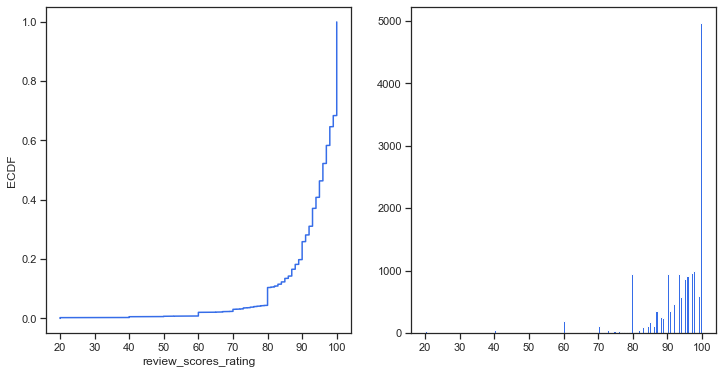

In [69]:
sns.set(style = "ticks")
plt.figure(figsize = (12, 6)) 
c = '#366DE8'

# ECDF
plt.subplot(121)
cdf = ECDF(df_1['review_scores_rating'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('review_scores_rating'); plt.ylabel('ECDF');

# overall distribution
plt.subplot(122)
plt.hist(df_1['review_scores_rating'].dropna(), 
         bins = int(np.sqrt(len(df_1['review_scores_rating']))),
         color = c);

- seems these missing data would effect little

In [70]:
df_1.groupby('review_scores_checkin')['review_scores_value'].describe()

count      mean       std  min   25%   50%    75%  \
review_scores_checkin                                                        
2.0                       31.0  4.000000  2.633122  2.0  2.00   2.0   6.00   
3.0                        1.0  3.000000       NaN  3.0  3.00   3.0   3.00   
4.0                       28.0  6.285714  2.290999  2.0  5.50   6.0   8.00   
5.0                       12.0  6.750000  1.544786  3.0  6.75   7.0   7.25   
6.0                      113.0  6.991150  2.011110  2.0  6.00   7.0   8.00   
7.0                       90.0  7.811111  1.389321  3.0  7.00   8.0   9.00   
8.0                      539.0  8.215213  1.578807  2.0  8.00   8.0   9.00   
9.0                     2039.0  8.913193  0.762091  4.0  9.00   9.0   9.00   
10.0                   12858.0  9.489734  0.807291  2.0  9.00  10.0  10.00   

                        max  
review_scores_checkin        
2.0                    10.0  
3.0                     3.0  
4.0                    10.0  
5.0                     9.0  
6.0                    10.0  
7.0                    10.0  
8.0                    10.0  
9.0                    10.0  
10.0                   10.0

In [71]:

df1 = df_1.dropna(subset=['name','host_is_superhost', 'property_type','room_type','price','bedrooms', 'bathrooms',
                       'guests_included','minimum_nights','maximum_nights','beds', 'review_scores_accuracy',
                       'number_of_reviews','reviews_per_month','review_scores_rating','review_scores_cleanliness',
                        'review_scores_checkin','review_scores_accuracy','review_scores_checkin','review_scores_communication',
                       'review_scores_location', 'review_scores_value','calculated_host_listings_count','availability_365',
                        'beds','bed_type','bedrooms','bathrooms','accommodates','TV','Wifi','Free street parking',
                         'Kitchen','Shampoo','Air conditioning','Hair dryer','Self check-in'])
df1 = df1.drop(['id'],axis=1)

In [72]:
df1.isnull().sum()

host_is_superhost                 0
property_type                     0
room_type                         0
price                             0
guests_included                   0
host_picture_url                  0
host_name                         0
neighbourhood                     0
host_neighbourhood                0
zipcode                           0
latitude                          0
longitude                         0
name                              0
first_review                      0
last_review                       0
picture_url                       0
listing_url                       0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value         

In [74]:
df1.shape

(15700, 47)

## feature selection and correlations
- Before encoding classes into numeric values, we can drop few highly correlated to the target variables. We do that in order to avoid large features weights in the model building.

- Data selection (dropping features)(Probably PCA is a better choice, we will do it if having more time)

In [75]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(df1, 20)

FirstVariable               SecondVariable  Correlation
0                          beds                 accommodates     0.873635
1                      bedrooms                 accommodates     0.819248
2                          beds                     bedrooms     0.778410
3          review_scores_rating          review_scores_value     0.733653
4          review_scores_rating    review_scores_cleanliness     0.724353
5          review_scores_rating       review_scores_accuracy     0.720199
6         review_scores_checkin  review_scores_communication     0.660232
7        review_scores_accuracy          review_scores_value     0.651416
8                      bedrooms                    bathrooms     0.625652
9             number_of_reviews            reviews_per_month     0.622673
10    review_scores_cleanliness          review_scores_value     0.614478
11       review_scores_accuracy    review_scores_cleanliness     0.611523
12         review_scores_rating  review_scores_communication     0.601968
13                    bathrooms                 accommodates     0.566415
14       review_scores_accuracy  review_scores_communication     0.556520
15                         beds                    bathrooms     0.554668
16         review_scores_rating        review_scores_checkin     0.536915
17  review_scores_communication          review_scores_value     0.522019
18                        price                     bedrooms     0.516943
19                        price                 accommodates     0.511957

It seem like beds and bedrooms are highly correlated to the variable accommodates. We also see that beds and bedrooms are highly correlated. These corrlated features could lead to unbalanced model fitting.
- we can drop these correlated features

In [76]:
columns = ['beds', 'bedrooms', 'review_scores_accuracy','review_scores_cleanliness','review_scores_value',
          'review_scores_communication','bathrooms','number_of_reviews']
df1 = df1.drop(columns, axis = 1)


In [77]:
# delete some un-correlational features
columns_1 = ['host_picture_url', 'host_name', 'neighbourhood',
       'host_neighbourhood', 'zipcode', 'latitude', 'longitude', 'street',
       'name', 'first_review', 'last_review', 'picture_url', 'listing_url',
            'room_type_1', 'property_type_1', 'bed_type_1']

df1 = df1.drop(columns_1, axis = 1)

In [78]:
df1.columns

Index(['host_is_superhost', 'property_type', 'room_type', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'reviews_per_month', 'review_scores_rating', 'review_scores_checkin',
       'review_scores_location', 'calculated_host_listings_count',
       'availability_365', 'bed_type', 'accommodates', 'TV', 'Wifi',
       'Free street parking', 'Kitchen', 'Shampoo', 'Air conditioning',
       'Hair dryer', 'Self check-in'],
      dtype='object')

- next step is look other variables correlations

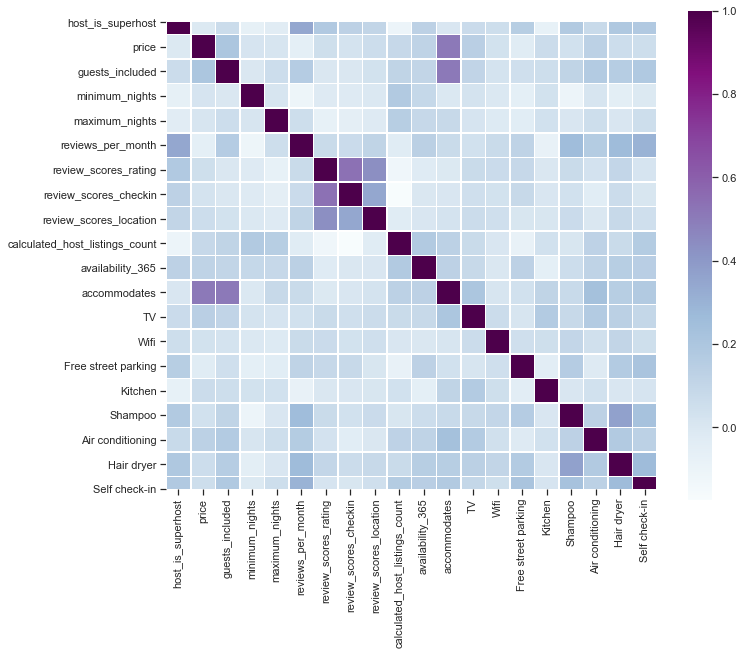

In [79]:
# Compute the correlation matrix 
corr_all = df1.corr()

f, ax = plt.subplots(figsize = (11, 9))

sns.heatmap(corr_all, square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

- it seems like review_scores_communication has a strong linear-like correlation with variable review_scores_rating and review_scores_checkin
- we can also plot the scatters for every continious variable in the dataset against each other

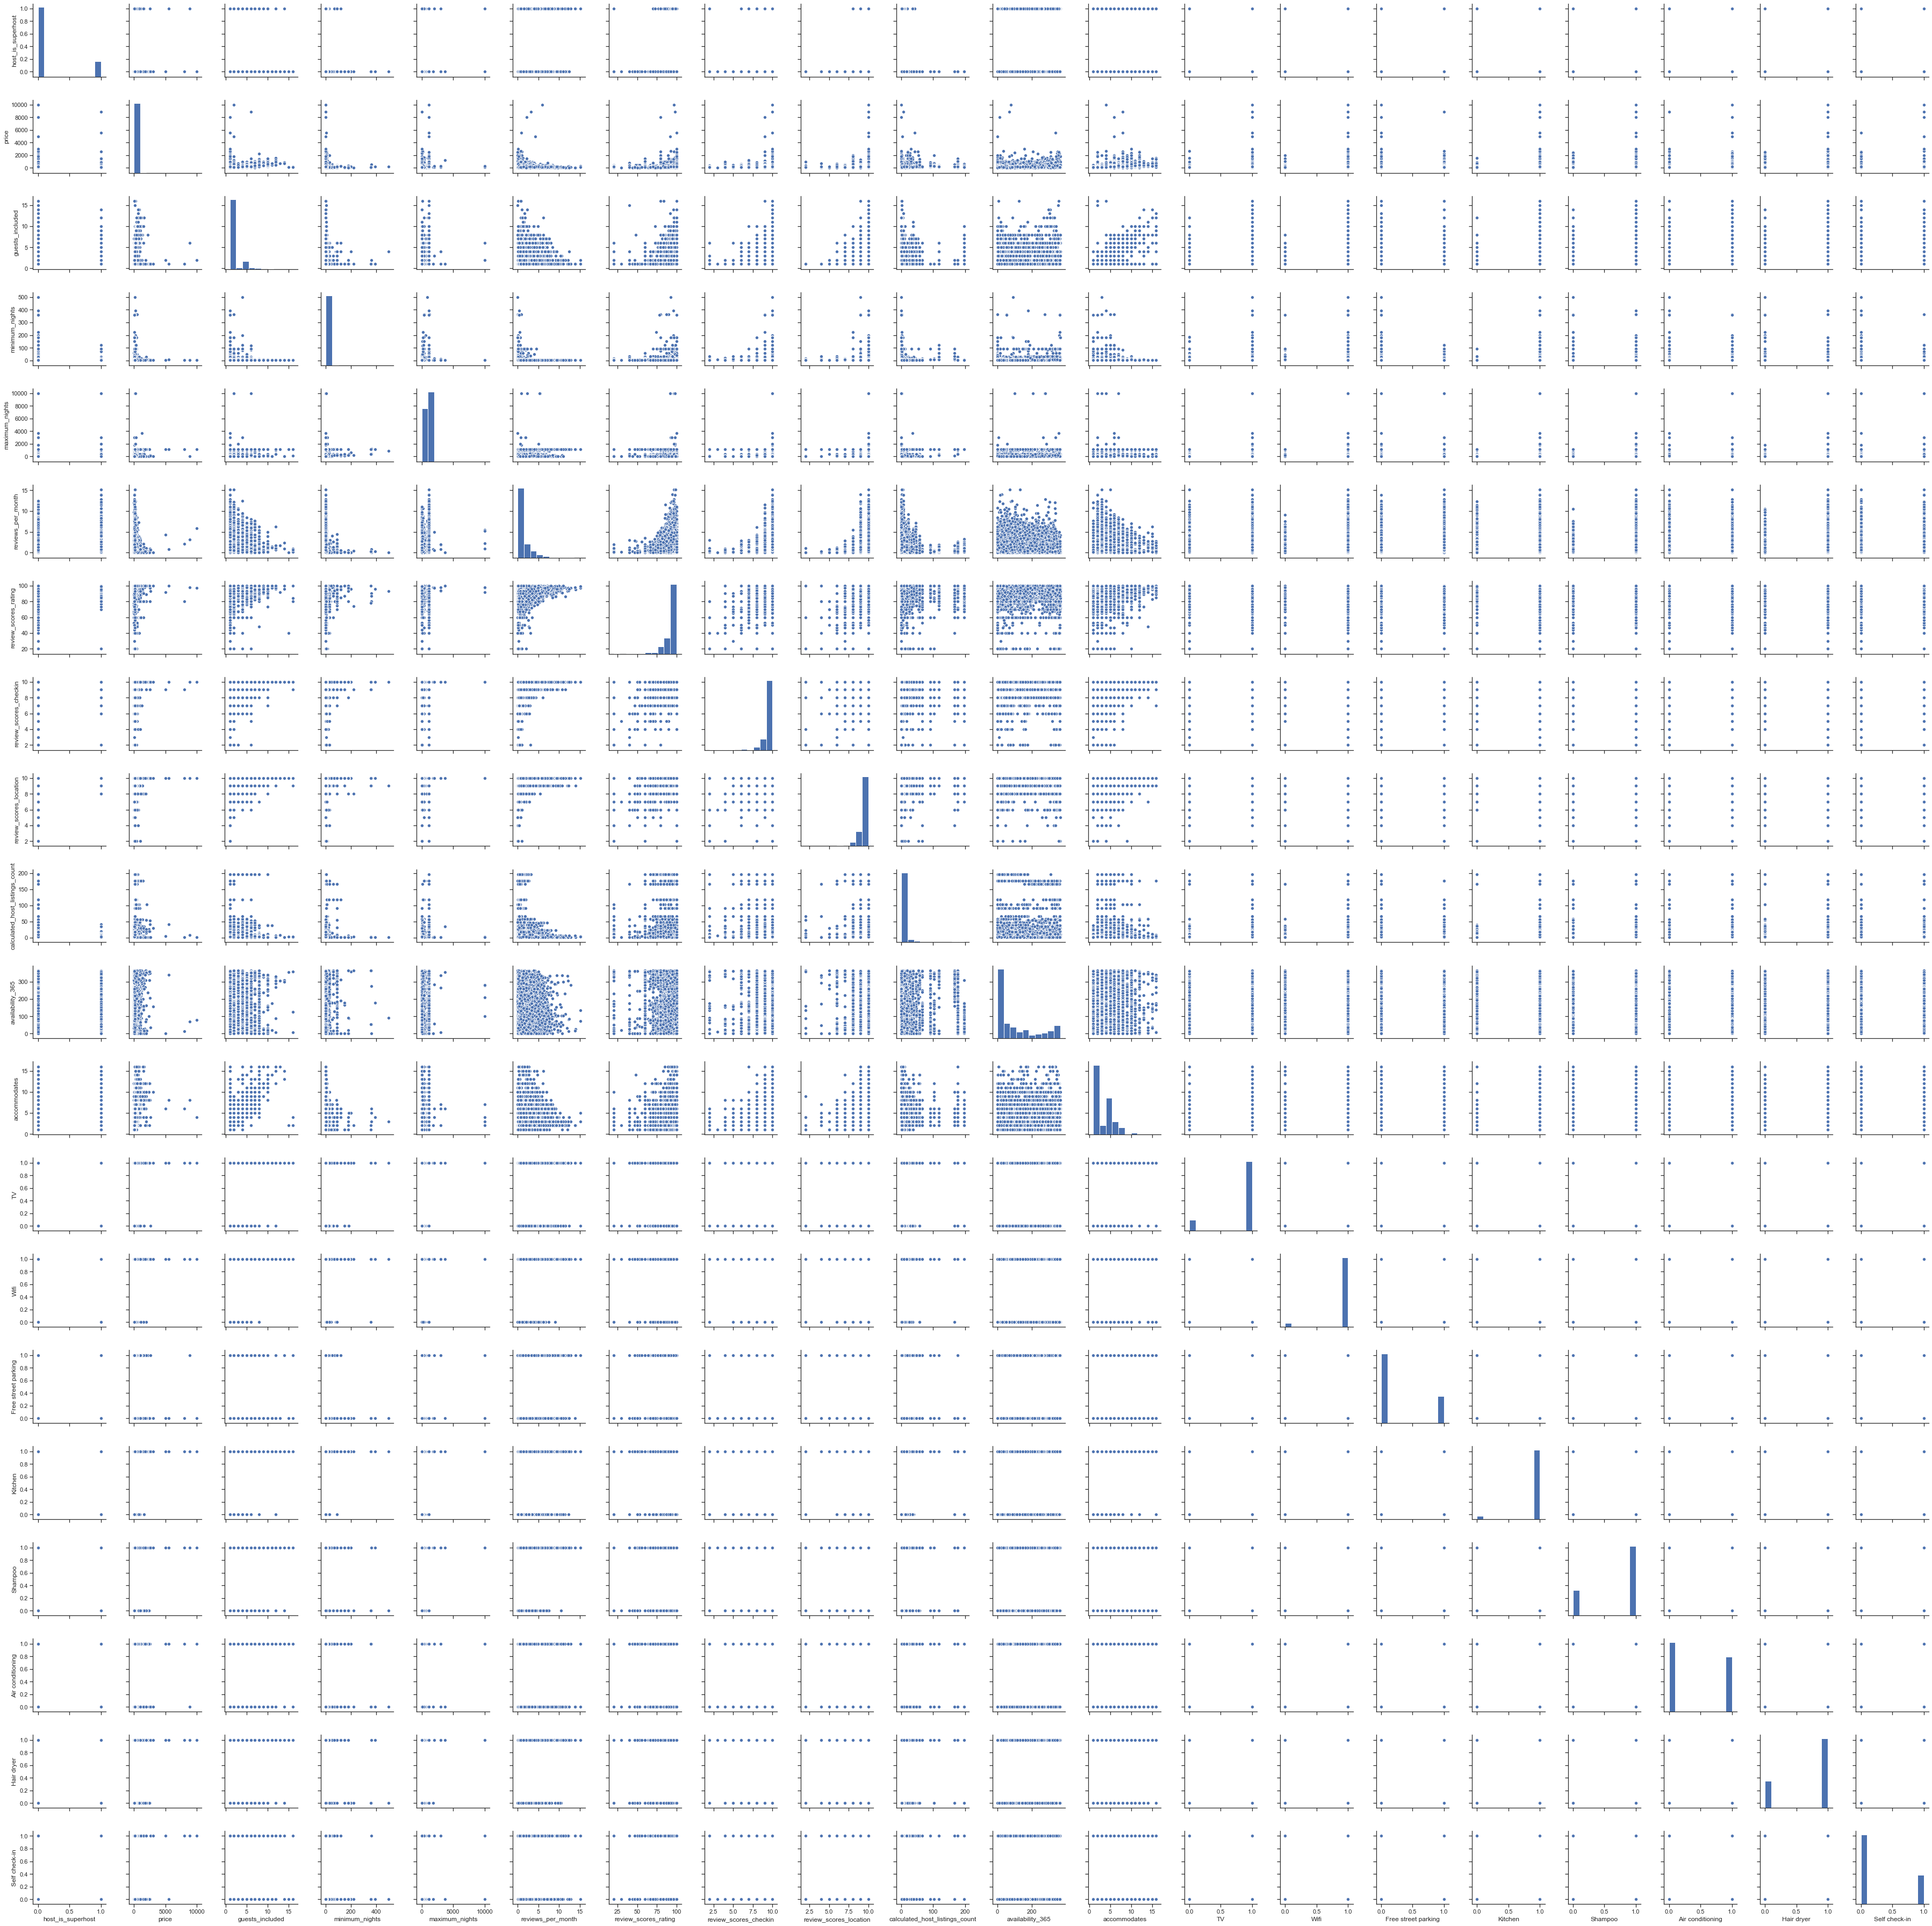

In [80]:
sns_plot = sns.pairplot(df1)
sns_plot.savefig('seaborn output.png')

- the graph above not noly reveal present trends in the dataset, but also shows the forms of each distribution. 
- out of curiously, we can take a look at the relationship between price and accommodates variable.  

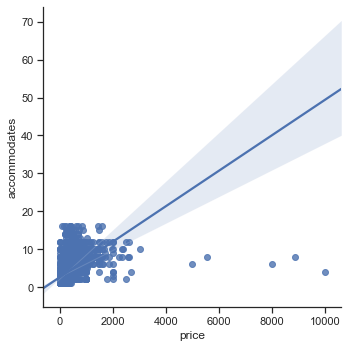

In [81]:
sns.lmplot('price','accommodates',df1, fit_reg= True)

Indeed we can see an increase in the number of accommondates of a unit is associated with a proportional increase in its price. 

In [82]:
df1.shape

(15700, 23)

In [83]:
def missingValueCheck(data):
    column_name = data.columns 
    #print(column_name)
    samples = data.shape[0] 
    print(samples)
    cols = data.shape[1] 
    for i in column_name:
        count = data[i].isin(['?']).sum()
        #print(count)
        if count != 0:
            pct = float(count)/samples*100 # compute the percentage of missing values
            print(str(i)+ ': '+ "{0:.4f}%".format(pct))

In [84]:
# Missing value check for train data
missingValueCheck(df)

22644


- ['Townhouse', 'House', 'Apartment', 'Guest suite', 'Loft', 'Guesthouse', 'Villa', 'Cabin', 'Bungalow', 'Condominium', 'Bed and breakfast', 'Cottage', 'Serviced apartment', 'Camper/RV', 'Boutique hotel', 'Other', 'Campsite', 'Dome house', 'Hostel', 'Tiny house', 'Treehouse', 'Tipi', 'Tent', 'Boat', 'Train', 'Island', 'Hotel', 'Chalet', 'Farm stay', 'Resort', 'Nature lodge', 'Casa particular (Cuba)', 'Aparthotel', 'Yurt', 'Hut', 'Barn']
- ['Private room', 'Entire home/apt', 'Shared room']
- ['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch']


In [85]:
df1.replace(['Townhouse', 'House', 'Apartment', 'Guest suite', 'Loft', 'Guesthouse', 'Villa',
            'Cabin', 'Bungalow', 'Condominium', 'Bed and breakfast', 'Cottage', 
            'Serviced apartment', 'Camper/RV', 'Boutique hotel', 'Other', 
            'Campsite', 'Dome house', 'Hostel', 'Tiny house', 'Treehouse', 
            'Tipi', 'Tent', 'Boat', 'Train', 'Island', 'Hotel', 'Chalet', 
            'Farm stay', 'Resort', 'Nature lodge', 'Casa particular (Cuba)', 
            'Aparthotel', 'Yurt', 'Hut', 'Barn'],
                 ['Townhouse', 'House','Apartment','Other','Other','Other','Other','Other','Other','Other'
                 ,'Other','Other','Other','Other','Other','Other','Other','Other','Other','Other'
                 ,'Other','Other','Other','Other','Other','Other','Other','Other','Other','Other'
                 ,'Other','Other','Other','Other','Other','Other'], 
                 inplace = True)

In [86]:
 
       

# Select numerical data and standardised them
cols_norm = ['host_is_superhost', 'price', 'guests_included','minimum_nights','maximum_nights',
             'reviews_per_month', 'review_scores_rating','review_scores_checkin','review_scores_location',
             'calculated_host_listings_count','availability_365','accommodates','TV','Wifi','Free street parking',
             'Kitchen','Shampoo', 'Air conditioning','Hair dryer','Self check-in']
df1[cols_norm] = df1[cols_norm].apply(lambda x: (x-np.mean(x))/np.std(x))


In [87]:
# Get cols that need to be converted to dummies
cols_dummy = ['property_type', 'room_type','bed_type']
# Change to dummies
dummy_features = pd.get_dummies(df1[cols_dummy])
# print(dummy_features)
# Concat dummy variables with columns kept
df1 = pd.concat([df1[cols_norm],dummy_features],axis=1)
print(df1.sample(4))

       host_is_superhost     price  guests_included  minimum_nights  \
15315          -0.474072 -0.437138        -0.504773       -0.107875   
10444          -0.474072  0.313961         3.130852       -0.107875   
17056          -0.474072 -0.389380        -0.504773       -0.183618   
7706           -0.474072 -0.150592         1.676602       -0.183618   

       maximum_nights  reviews_per_month  review_scores_rating  \
15315        0.819770          -0.682567              0.289474   
10444        0.819770           0.606108             -0.464269   
17056        0.819770           0.437204              0.181797   
7706        -1.187705          -0.613754              0.720185   

       review_scores_checkin  review_scores_location  \
15315               0.364260                0.444936   
10444              -0.960168                0.444936   
17056               0.364260                0.444936   
7706                0.364260                0.444936   

       calculated_host_listings_

In [88]:
df1.sample(4)

host_is_superhost     price  guests_included  minimum_nights  \
19195          -0.474072 -0.172300        -0.504773        0.195101   
18437          -0.474072 -0.016002        -0.504773        2.012951   
3736            2.109383 -0.306890        -0.504773       -0.183618   
2446           -0.474072  0.548408        -0.504773       -0.107875   

       maximum_nights  reviews_per_month  review_scores_rating  \
19195        0.819770          -0.726357             -1.433367   
18437        0.817951          -0.645033             -0.033558   
3736        -0.880402           0.287067              0.504830   
2446        -1.134973          -0.125809              0.720185   

       review_scores_checkin  review_scores_location  \
19195               0.364260                0.444936   
18437               0.364260                0.444936   
3736               -0.960168                0.444936   
2446                0.364260                0.444936   

       calculated_host_listings_count  ...  property_type_Other  \
19195                       -0.255028  ...                    0   
18437                        5.368094  ...                    0   
3736                        -0.255028  ...                    0   
2446                        -0.255028  ...                    0   

       property_type_Townhouse  room_type_Entire home/apt  \
19195                        0                          1   
18437                        0                          1   
3736                         0                          1   
2446                         0                          1   

       room_type_Private room  room_type_Shared room  bed_type_Airbed  \
19195                       0                      0                0   
18437                       0                      0                0   
3736                        0                      0                0   
2446                        0                      0                0   

       bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  \
19195               0               0                       0   
18437               0               0                       0   
3736                0               0                       0   
2446                0               0                       0   

       bed_type_Real Bed  
19195                  1  
18437                  1  
3736                   1  
2446                   1  

[4 rows x 32 columns]

Exclude dependent variable ( price)

In [89]:
dependent_var = df1["price"].values
df1.drop(["price"], axis=1, inplace=True)

In [90]:
pd.value_counts(pd.Series(dependent_var))/df1.shape[0]

-0.172300    0.046561
-0.389380    0.041401
 0.040439    0.039236
-0.302548    0.029554
-0.563045    0.027452
               ...   
 6.513779    0.000064
 0.070830    0.000064
 1.477512    0.000064
 1.143208    0.000064
 3.131665    0.000064
Length: 468, dtype: float64

In [91]:
# Convert dataframe to array type for easy handling
arr_df1 = np.array(df1)
print(arr_df1.shape)

(15700, 31)


In [92]:
arr_df1

array([[-0.47407227,  1.67660211,  0.42233186, ...,  0.        ,
         0.        ,  1.        ],
       [-0.47407227, -0.50477297, -0.25936213, ...,  0.        ,
         0.        ,  1.        ],
       [-0.47407227,  0.22235205, -0.25936213, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.47407227,  1.67660211, -0.25936213, ...,  0.        ,
         0.        ,  1.        ],
       [-0.47407227,  1.67660211, -0.18361835, ...,  0.        ,
         0.        ,  1.        ],
       [-0.47407227, -0.50477297, -0.25936213, ...,  0.        ,
         0.        ,  1.        ]])

# predictive modelling
In this section we will use Random forest algorithm. 
- reason we choose this algorithm:
* Random Forest Regressor fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting by reducing the overall variance. It is one of the most popular machine learning algorithms and widely used by the community.

Before we doing the predictive, we need to do some preprocess work on the data first. 
- If a feature has a variance that is much larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. That is why we need to scale the data first.

Notice we have some variables whose type is not int or float. 
In order to use categorical variables in the model fitting we need to encode them into dummies.
* we can not just give these variables a score to show which is better than which, because this method is too optional. 

In this section, we split the dataset into train and test part. This method can reduce the validation error.

In [93]:

X_train, X_test, y_train, y_test = train_test_split(arr_df1, dependent_var, 
                                                    test_size = 0.2,
                                                    random_state = 1)


print("X_Train", X_train.shape, "and X_test", X_test.shape)
print("y_Train", y_train.shape, "and y_test", y_test.shape)
print(X_train)

X_Train (12560, 31) and X_test (3140, 31)
y_Train (12560,) and y_test (3140,)
[[-0.47407227 -0.50477297  0.72530697 ...  0.          0.
   1.        ]
 [-0.47407227  0.22235205  0.11935675 ...  0.          0.
   1.        ]
 [-0.47407227 -0.50477297 -0.18361835 ...  0.          0.
   1.        ]
 ...
 [-0.47407227 -0.50477297 -0.18361835 ...  0.          0.
   1.        ]
 [-0.47407227  1.67660211 -0.18361835 ...  0.          0.
   1.        ]
 [-0.47407227 -0.50477297  6.48183402 ...  0.          0.
   1.        ]]


- make all data into int

In [94]:
print(y_train)

[-0.61514386 -0.58475259 -0.25044865 ...  0.69602224  0.04043919
 -0.48055396]


In [95]:
y_train = y_train.ravel()
y_train = y_train.astype(int)
print(y_train.shape)

(12560,)


In [96]:

y_test = y_test.ravel()
y_test = y_test.astype(int)

# X_test = X_test.ravel()
# X_test = X_test.astype(int)

## Random Forest Regressor
- n_estimators: the number of trees to build before taking the maximum voting or averages of predictions. Higher number of trees gives better performance. In this case we take n_estimators = 300.
- max_features: the number of features to consider when looking for the best split. We already now that the percentage of relevant features is between 10-40%, so we take this range.
- min_samples_leaf : the minimum sample leaf size is highly dependent on the sample size. We will leave it at the default value of 2.
- max_depth: the maximum depth of the tree also depends on the sample size. More data - bigger the depth. Here, in the contrary, we have quite a big dataset so the range between 5 and 20 with a step of 1 will be enough.

/Users/fanbowen/Documents/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 1) accommodates                   0.158692
 2) reviews_per_month              0.129224
 3) availability_365               0.118402
 4) minimum_nights                 0.080401
 5) maximum_nights                 0.070712
 6) review_scores_rating           0.066339
 7) calculated_host_listings_count 0.057902
 8) guests_included                0.049768
 9) property_type_House            0.036617
10) Air conditioning               0.023884
11) review_scores_location         0.023745
12) Free street parking            0.021782
13) Self check-in                  0.021705
14) Hair dryer                     0.019081
15) Shampoo                        0.018967
16) property_type_Apartment        0.018081
17) review_scores_checkin          0.017494
18) room_type_Entire home/apt      0.016044
19) host_is_superhost              0.013720
20) property_type_Other            0.009592
21) room_type_Private room         0.006735
22) TV                             0.006183
23) Wifi                        

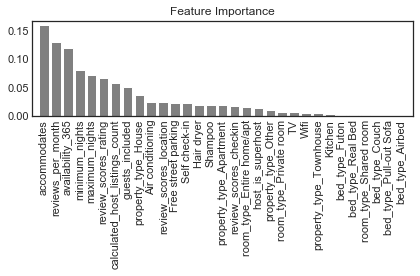

In [97]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
col_names = df1.columns.values

# print(col_names)

# Train random forest classifier
forest = clf.fit(X_train, y_train)


# Print the name and gini importance of each feature in decreasing order
importance = forest.feature_importances_
idx = np.argsort(importance)[::-1]
for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i+1,30,col_names[idx[i]],importance[idx[i]]))
    
# Plot feature importance in decreasing order
plt.style.use('seaborn-white')
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importance[idx],color='grey',align='center')
plt.xticks(range(X_train.shape[1]), col_names[idx], rotation=90) # labels on x-axis
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.savefig('feature.png',format = 'png' )
plt.show()
plt.close()

select top 4 key features  
- accommodates                   0.141682
- availability_365               0.111216
- reviews_per_month              0.101733
- number_of_reviews              0.080438

In [98]:
import time
from sklearn.metrics import confusion_matrix

In [99]:
def select_feature(model, x, k=10):
    return x[:,model.feature_importances_.argsort()[::-1][:k]] # return highest k features

X_train_1 = select_feature(clf,X_train,10)
# print(X_train_1)
X_test_1 = select_feature(clf,X_test,10)
# print(X_test_1)

In [102]:
from sklearn.metrics import classification_report
t0 = time.time()

rf = RandomForestClassifier()
clf_rf_1 = rf.fit(X_train_1, y_train)
t1 = time.time()
print('Classifier Runtime: '+ str(t1-t0)+'s')

# Evaluation
t2 = time.time()
pred = clf_rf_1.predict(X_test_1)
print(pred.shape)
clf_rf_cm=confusion_matrix(y_test,pred)
print('Confusion_matrix is\n{}'.format(clf_rf_cm))
print(classification_report(y_test, pred))

rf_scores = cross_val_score(clf, X_train, y_train, cv=10,scoring = 'accuracy')
# rf_scores1 = cross_val_score(clf, X_train, y_train, cv=10,scoring = 'roc_auc')


#print('10-fold CV accuracy scores: %s' % rf_scores)
print('10-fold CV accuracy: %.3f +/- %.3f' % (np.mean(rf_scores), np.std(rf_scores)))
# print('10-fold CV ROC AUC: %.3f +/- %.3f' % (np.mean(rf_scores1), np.std(rf_scores1)))
t3=time.time()
print('Evaluation Runtime: '+ str(t3-t2)+'s')

/Users/fanbowen/Documents/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/fanbowen/Documents/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/fanbowen/Documents/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Classifier Runtime: 0.09816908836364746s
(3140,)
Confusion_matrix is
[[2892   21    9    1    0    0    0    0    0    0]
 [  94   18    6    4    0    0    0    0    0    0]
 [  30    6    1    7    1    1    0    0    0    0]
 [  16    5    4    4    0    0    0    0    0    0]
 [   2    2    0    1    0    0    0    0    0    0]
 [   3    0    0    2    0    0    0    0    0    0]
 [   1    0    0    0    0    1    0    0    0    0]
 [   0    0    1    1    0    0    0    0    0    0]
 [   0    0    2    0    0    0    0    0    0    0]
 [   2    1    1    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2923
           1       0.34      0.15      0.21       122
           2       0.04      0.02      0.03        46
           3       0.20      0.14      0.16        29
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.

In [103]:
filename_1 = "dataset_v1.csv"
df11 = pd.read_csv(filename_1)

In [104]:
df11.isnull().sum()

id                                   0
host_is_superhost                    0
property_type                        0
room_type                            0
price                                0
guests_included                      0
host_picture_url                     2
host_name                            2
neighbourhood                        0
host_neighbourhood                6906
zipcode                              1
latitude                             0
longitude                            0
name                                 4
first_review                         4
last_review                          4
picture_url                          0
listing_url                          0
minimum_nights                       0
maximum_nights                       0
number_of_reviews                    0
reviews_per_month                    4
review_scores_rating                 4
review_scores_accuracy               9
review_scores_cleanliness            8
review_scores_checkin    

In [105]:
df11=df11.dropna(subset=['host_picture_url','host_name','host_neighbourhood','zipcode','name',
                        'first_review','last_review','reviews_per_month','review_scores_rating',
                        'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                        'review_scores_communication','review_scores_location','review_scores_value',
                        'beds','bedrooms','bathrooms'])

In [106]:
df11.isnull().sum()

id                                0
host_is_superhost                 0
property_type                     0
room_type                         0
price                             0
guests_included                   0
host_picture_url                  0
host_name                         0
neighbourhood                     0
host_neighbourhood                0
zipcode                           0
latitude                          0
longitude                         0
name                              0
first_review                      0
last_review                       0
picture_url                       0
listing_url                       0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location      

In [107]:
cluster_1 = df11[df11['street'] == 'Zetland']

In [108]:
cluster_1.shape

(141, 48)

In [109]:
cluster_2 = df11[df11['street'] == 'Kingsford']

In [110]:
cluster_2.shape

(89, 48)

In [111]:
cluster_3 = df11[df11['street'] == 'Randwick']
print(cluster_3.shape)

(379, 48)


In [112]:
cluster_4 = df11[df11['street'] == 'Alexandria']
print(cluster_4.shape)

(146, 48)


In [113]:
cluster_5 = df11[df11['street'] == 'Bondi']
print(cluster_5.shape)

(455, 48)


In [114]:
cluster_6 = df11[df11['street'] == 'Bondi Beach']
print(cluster_6.shape)

(981, 48)


In [115]:
df = pd.concat((cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6),axis=0)

In [116]:
df.shape

(2191, 48)

In [117]:
dataframe = pd.DataFrame(df)
dataframe.to_csv('data.csv', index=False, sep=',')

In [118]:
filename1 = "data_v3.csv"
df11 = pd.read_csv(filename1)

In [119]:
df11

id        create_time               update_time  is_delete  \
0        1  1/7/2019 00:00:00  3/8/2019 19:12:26.139222          0   
1        2  1/7/2019 00:00:00         2/7/2019 00:00:00          0   
2        3  1/7/2019 00:00:00         2/7/2019 00:00:00          0   
3        4  1/7/2019 00:00:00         2/7/2019 00:00:00          0   
4        5  1/7/2019 00:00:00         2/7/2019 00:00:00          0   
...    ...                ...                       ...        ...   
2186  2187  1/7/2019 00:00:00         2/7/2019 00:00:00          0   
2187  2188  1/7/2019 00:00:00         2/7/2019 00:00:00          0   
2188  2189  1/7/2019 00:00:00         2/7/2019 00:00:00          0   
2189  2190  1/7/2019 00:00:00         2/7/2019 00:00:00          0   
2190  2191  1/7/2019 00:00:00         2/7/2019 00:00:00          0   

                                                  title  addr_street  \
0                                City and Cafe Central           NaN   
1      Entire 2brm Apartment in Zetland - All You Need!          NaN   
2                   Retro chic, cosy and Sydney Central          NaN   
3                           Great Sydney loft apartment          NaN   
4     Stunning Private Room+Bath, All incl, Views, Wifi          NaN   
...                                                 ...          ...   
2186   Sun filled apartment in the heart of Bondi Beach          NaN   
2187   Queen bed, private bath, modern, 5 mins to Beach          NaN   
2188       Spacious room in Bondi beach house with pool          NaN   
2189          Beach Road Pad @ the heart of Bondi Beach          NaN   
2190                             Footprints On The Sand          NaN   

        addr_city  people start_date    end_date  ...  \
0         Zetland       1   1/7/2019  31/12/2020  ...   
1         Zetland       2   1/7/2019  31/12/2020  ...   
2         Zetland       2   1/7/2019  31/12/2020  ...   
3         Zetland       1   1/7/2019  31/12/2020  ...   
4         Zetland       1   1/7/2019  31/12/2020  ...   
...           ...     ...        ...         ...  ...   
2186  Bondi Beach       1   1/7/2019  31/12/2020  ...   
2187  Bondi Beach       1   1/7/2019  31/12/2020  ...   
2188  Bondi Beach       1   1/7/2019  31/12/2020  ...   
2189  Bondi Beach       1   1/7/2019  31/12/2020  ...   
2190  Bondi Beach       1   1/7/2019  31/12/2020  ...   

     calculated_host_listings_count  \
0                                 1   
1                                 1   
2                                 1   
3                                 1   
4                                 1   
...                             ...   
2186                              1   
2187                              2   
2188                              1   
2189                              1   
2190                              1   

                                                pic_url  pic1  pic2  pic3  \
0     https://a0.muscache.com/im/pictures/a47725fd-a...   NaN   NaN   NaN   
1     https://a0.muscache.com/im/pictures/14785819/0...   NaN   NaN   NaN   
2     https://a0.muscache.com/im/pictures/54688528/d...   NaN   NaN   NaN   
3     https://a0.muscache.com/im/pictures/f6507ec7-6...   NaN   NaN   NaN   
4     https://a0.muscache.com/im/pictures/71759930/2...   NaN   NaN   NaN   
...                                                 ...   ...   ...   ...   
2186  https://a0.muscache.com/im/pictures/f5fab869-7...   NaN   NaN   NaN   
2187  https://a0.muscache.com/im/pictures/e0a0cbd7-8...   NaN   NaN   NaN   
2188  https://a0.muscache.com/im/pictures/e8ba5bde-8...   NaN   NaN   NaN   
2189  https://a0.muscache.com/im/pictures/5d4a2791-8...   NaN   NaN   NaN   
2190  https://a0.muscache.com/im/pictures/4ac0199b-8...   NaN   NaN   NaN   

      pic4  pic5  pic6  host_user_id  cluster  
0      NaN   NaN   NaN             2      NaN  
1      NaN   NaN   NaN             2      NaN  
2      NaN   NaN   NaN             2      NaN  
3      NaN   NaN   NaN         

In [120]:
new_df = df11[['accommodates','availability_365','reviews_per_month','reviews_number']]

In [121]:
new_df.isnull().sum()


accommodates         0
availability_365     0
reviews_per_month    0
reviews_number       0
dtype: int64

In [122]:
new_df = new_df.dropna(subset = ['reviews_per_month'])

In [123]:
from pandas import DataFrame
import sklearn.metrics as metrics
from sklearn import mixture 
import warnings
warnings.filterwarnings('ignore')

In [124]:
new_df.sample(10)

accommodates  availability_365  reviews_per_month  reviews_number
993              2                 0               0.08               2
442              2                80               0.49              11
1319            10                11               0.02               1
1652            10                 0               2.31              67
2121             4                 9               0.21               1
1631             6                 0               0.07               2
694              6               167               0.55               8
1488             4                66               0.44              16
1060             2                 0               0.18               3
210              1                 0               0.10               1

In [125]:
new_df.isnull().sum()

accommodates         0
availability_365     0
reviews_per_month    0
reviews_number       0
dtype: int64

In [126]:
new_df

accommodates  availability_365  reviews_per_month  reviews_number
0                2               346               1.37              96
1                4               168               3.00               3
2                2                74               0.38              14
3                2                 0               0.07               2
4                1                40               0.65              29
...            ...               ...                ...             ...
2186             2                30               1.11               2
2187             2               122               3.00               3
2188             1                34               0.71               1
2189             3               184               6.49               8
2190             2               253               3.00               3

[2191 rows x 4 columns]

In [127]:
indices = [2,39,56, 79]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(new_df.loc[indices], columns = new_df.keys()).reset_index(drop = True)
print("Chosen samples of dataset:" )
display(samples)

Chosen samples of dataset:


accommodates  availability_365  reviews_per_month  reviews_number
0             2                74               0.38              14
1             2               363               0.28               6
2             3                72               2.98              41
3             5               143               2.24              25

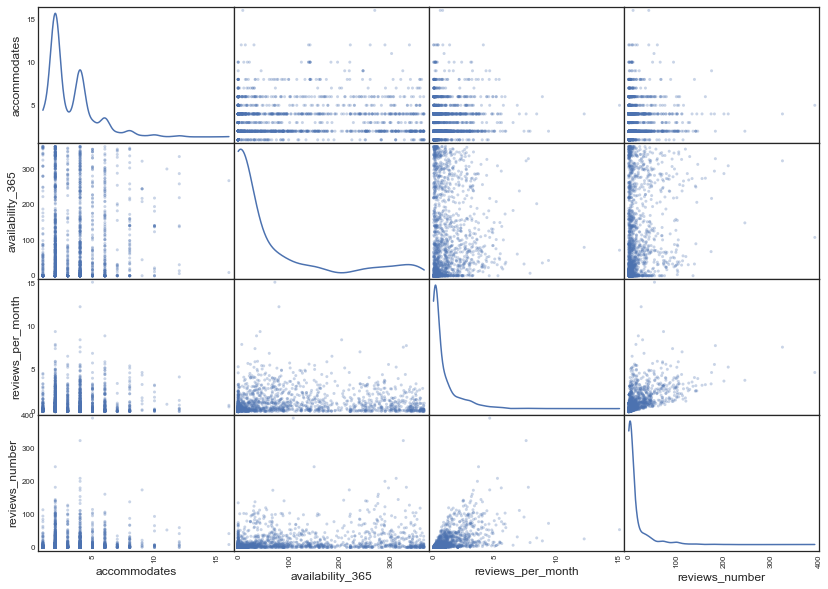

In [128]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(new_df, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

In [129]:
log_data = np.log(new_df)
log_samples = np.log(samples)
from IPython.display import display
display(samples)
display(log_samples)

accommodates  availability_365  reviews_per_month  reviews_number
0             2                74               0.38              14
1             2               363               0.28               6
2             3                72               2.98              41
3             5               143               2.24              25

accommodates  availability_365  reviews_per_month  reviews_number
0      0.693147          4.304065          -0.967584        2.639057
1      0.693147          5.894403          -1.272966        1.791759
2      1.098612          4.276666           1.091923        3.713572
3      1.609438          4.962845           0.806476        3.218876

In [130]:
def pca_results(good_data, pca):
	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions
	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)
	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))
	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

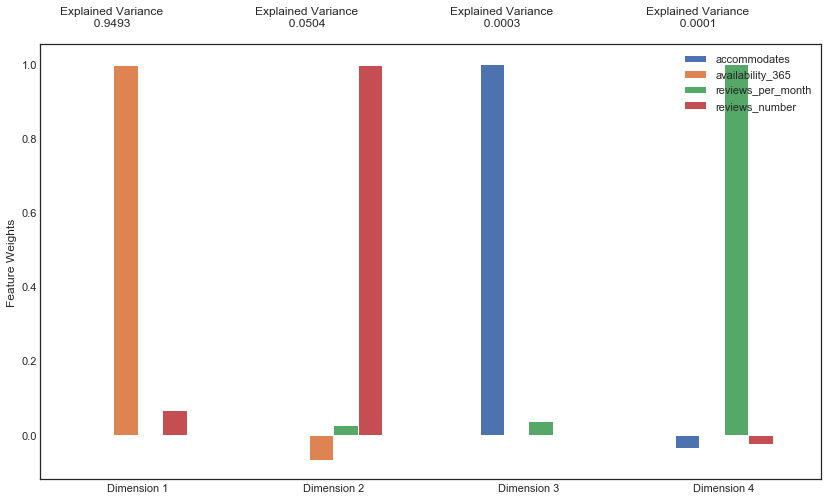

In [131]:

# apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=new_df.shape[1])
pca.fit(new_df)
pca_samples = pca.transform(log_samples)
# Generate PCA results plot
pca_results = pca_results(new_df, pca)

# print pca_results['Explained Variance'].cumsum()

In [132]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4
0     -76.6241      -7.0500      -2.4204      -1.3648
1     -75.0949      -8.0100      -2.4319      -1.6482
2     -76.5742      -5.9220      -1.9444       0.6501
3     -75.9224      -6.4681      -1.4440       0.3593

In [133]:
# print(new_df) 
pca = PCA(n_components=2)
pca.fit(new_df)
reduced_data = pca.transform(new_df)
pca_samples = pca.transform(log_samples)
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0     -76.6241      -7.0500
1     -75.0949      -8.0100
2     -76.5742      -5.9220
3     -75.9224      -6.4681

In [134]:
def biplot(good_data, reduced_data, pca):
    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
#     for i, v in enumerate(feature_vectors):
#         ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
#                   head_width=0.2, head_length=0.2, linewidth=2, color='red')
# #         ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
# #                  ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

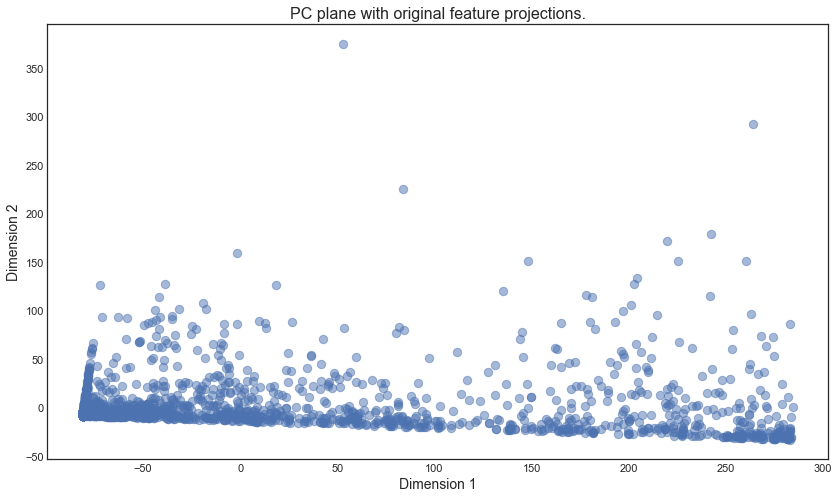

In [135]:
# Create a biplot
biplot(df, reduced_data, pca)

In [136]:
components = np.arange(2,50)
from sklearn import mixture
max_silhouette_score = 0
chosen_num_components = 0
for num_components in components:
    clusterer = mixture.GaussianMixture(n_components=num_components,random_state=42).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.means_

    sample_preds = clusterer.predict(pca_samples)
    # print(sample_preds)
    #calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, preds)
    print ("The silhouette score for {} clusters is {}.".format(num_components, score))
    if max_silhouette_score < score:
        max_silhouette_score = score
        chosen_num_components = num_components

if (chosen_num_components != components[-1]):
    clusterer = mixture.GaussianMixture(n_components=chosen_num_components,random_state=42).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    score = max_silhouette_score
    
print(chosen_num_components)

The silhouette score for 2 clusters is 0.26187150764803274.
The silhouette score for 3 clusters is 0.32995024445814697.
The silhouette score for 4 clusters is 0.21895209145308947.
The silhouette score for 5 clusters is 0.2787893723301034.
The silhouette score for 6 clusters is 0.29320159680010965.
The silhouette score for 7 clusters is 0.3422968748573777.
The silhouette score for 8 clusters is 0.3154252594819915.
The silhouette score for 9 clusters is 0.3013132597237821.
The silhouette score for 10 clusters is 0.2987735817636999.
The silhouette score for 11 clusters is 0.38501961941409746.
The silhouette score for 12 clusters is 0.3591072722615254.
The silhouette score for 13 clusters is 0.3140080832308595.
The silhouette score for 14 clusters is 0.34426772037031933.
The silhouette score for 15 clusters is 0.32289192836753805.
The silhouette score for 16 clusters is 0.3156313141111869.
The silhouette score for 17 clusters is 0.3194267447192809.
The silhouette score for 18 clusters is 0

In [137]:
def cluster_results(reduced_data, preds, centers, pca_samples):
	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = plt.cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'): 
        # print("i ",i)
        # print("clister", cluster)
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

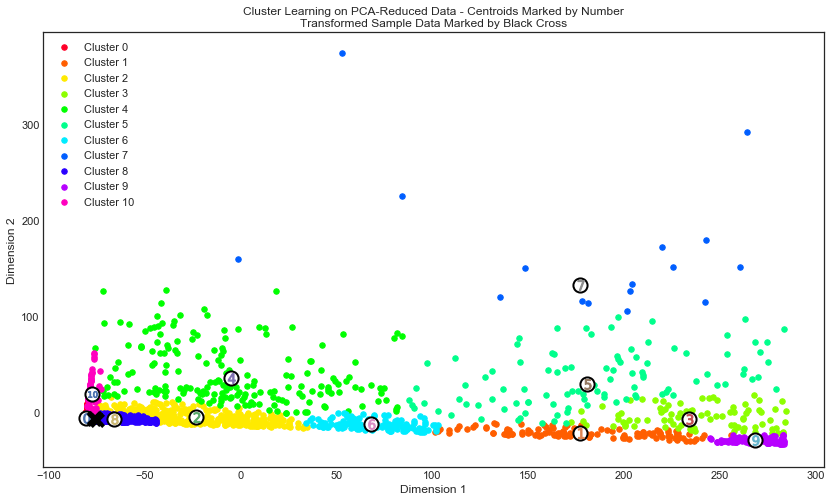

In [138]:
# Display the results of the clustering from implementation
cluster_results(reduced_data, preds, centers, pca_samples)

In [139]:
sample_preds

array([8, 8, 8, 8])

In [140]:
# Display the predictions
id_list = []
cluster_list = []
for i, pred in enumerate(preds):
    print("id", i, "predicted to be in Cluster", pred)
    id_list.append(i)
    cluster_list.append(pred)
    

id 0 predicted to be in Cluster 5
id 1 predicted to be in Cluster 6
id 2 predicted to be in Cluster 2
id 3 predicted to be in Cluster 0
id 4 predicted to be in Cluster 4
id 5 predicted to be in Cluster 4
id 6 predicted to be in Cluster 2
id 7 predicted to be in Cluster 0
id 8 predicted to be in Cluster 3
id 9 predicted to be in Cluster 0
id 10 predicted to be in Cluster 2
id 11 predicted to be in Cluster 0
id 12 predicted to be in Cluster 4
id 13 predicted to be in Cluster 0
id 14 predicted to be in Cluster 2
id 15 predicted to be in Cluster 0
id 16 predicted to be in Cluster 5
id 17 predicted to be in Cluster 0
id 18 predicted to be in Cluster 9
id 19 predicted to be in Cluster 3
id 20 predicted to be in Cluster 3
id 21 predicted to be in Cluster 4
id 22 predicted to be in Cluster 4
id 23 predicted to be in Cluster 0
id 24 predicted to be in Cluster 0
id 25 predicted to be in Cluster 0
id 26 predicted to be in Cluster 0
id 27 predicted to be in Cluster 0
id 28 predicted to be in Clust

id 779 predicted to be in Cluster 4
id 780 predicted to be in Cluster 1
id 781 predicted to be in Cluster 1
id 782 predicted to be in Cluster 9
id 783 predicted to be in Cluster 1
id 784 predicted to be in Cluster 0
id 785 predicted to be in Cluster 0
id 786 predicted to be in Cluster 0
id 787 predicted to be in Cluster 0
id 788 predicted to be in Cluster 2
id 789 predicted to be in Cluster 5
id 790 predicted to be in Cluster 9
id 791 predicted to be in Cluster 8
id 792 predicted to be in Cluster 3
id 793 predicted to be in Cluster 0
id 794 predicted to be in Cluster 0
id 795 predicted to be in Cluster 0
id 796 predicted to be in Cluster 7
id 797 predicted to be in Cluster 9
id 798 predicted to be in Cluster 0
id 799 predicted to be in Cluster 4
id 800 predicted to be in Cluster 9
id 801 predicted to be in Cluster 4
id 802 predicted to be in Cluster 1
id 803 predicted to be in Cluster 8
id 804 predicted to be in Cluster 2
id 805 predicted to be in Cluster 0
id 806 predicted to be in Cl

id 1656 predicted to be in Cluster 0
id 1657 predicted to be in Cluster 0
id 1658 predicted to be in Cluster 0
id 1659 predicted to be in Cluster 0
id 1660 predicted to be in Cluster 9
id 1661 predicted to be in Cluster 4
id 1662 predicted to be in Cluster 0
id 1663 predicted to be in Cluster 5
id 1664 predicted to be in Cluster 3
id 1665 predicted to be in Cluster 0
id 1666 predicted to be in Cluster 4
id 1667 predicted to be in Cluster 3
id 1668 predicted to be in Cluster 4
id 1669 predicted to be in Cluster 3
id 1670 predicted to be in Cluster 2
id 1671 predicted to be in Cluster 9
id 1672 predicted to be in Cluster 8
id 1673 predicted to be in Cluster 1
id 1674 predicted to be in Cluster 8
id 1675 predicted to be in Cluster 5
id 1676 predicted to be in Cluster 1
id 1677 predicted to be in Cluster 0
id 1678 predicted to be in Cluster 0
id 1679 predicted to be in Cluster 2
id 1680 predicted to be in Cluster 0
id 1681 predicted to be in Cluster 4
id 1682 predicted to be in Cluster 6
i

In [141]:
df11['cluster'] = pd.DataFrame(cluster_list)

In [142]:
df11.sample(15)

id        create_time        update_time  is_delete  \
2024  2025  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
1341  1342  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
175    176  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
1093  1094  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
2190  2191  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
1009  1010  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
2117  2118  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
2169  2170  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
1504  1505  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
1351  1352  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
62      63  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
1565  1566  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
1418  1419  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
229    230  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
559    560  1/7/2019 00:00:00  2/7/2019 00:00:00          0   

                                                  title  addr_street  \
2024    Beautiful apartment in the heart of Bondi Beach          NaN   
1341           Big Bondi Beach apartment , Entire place          NaN   
175                                   Cozy Private Room          NaN   
1093        Bondi Beach Penthouse - Amazing Ocean Views          NaN   
2190                             Footprints On The Sand          NaN   
1009      ADRIFT EASTnew house nestled between2 beaches          NaN   
2117                       Cross the road to the beach!          NaN   
2169   Entire one bedroom apartment almost on the beach          NaN   
1504                       Spacious 1 Bedroom Apartment          NaN   
1351                       Amazing Bondi Beach Location          NaN   
62    Luxury Living-sleeps 8, 2 car spots, close to CBD          NaN   
1565                          Bright and airy beach pad          NaN   
1418            Free Parking 3 min walk to Bondi Beach!          NaN   
229                           UNSW-close student suites          NaN   
559   Nice and sunny private room.....Live like a lo...          NaN   

        addr_city  people start_date    end_date  ...  \
2024  Bondi Beach       1   1/7/2019  31/12/2020  ...   
1341  Bondi Beach       1   1/7/2019  31/12/2020  ...   
175     Kingsford       1   1/7/2019  31/12/2020  ...   
1093        Bondi       1   1/7/2019  31/12/2020  ...   
2190  Bondi Beach       1   1/7/2019  31/12/2020  ...   
1009        Bondi       1   1/7/2019  31/12/2020  ...   
2117  Bondi Beach       1   1/7/2019  31/12/2020  ...   
2169  Bondi Beach       1   1/7/2019  31/12/2020  ...   
1504  Bondi Beach       1   1/7/2019  31/12/2020  ...   
1351  Bondi Beach       1   1/7/2019  31/12/2020  ...   
62        Zetland       6   1/7/2019  31/12/2020  ...   
1565  Bondi Beach       1   1/7/2019  31/12/2020  ...   
1418  Bondi Beach       2   1/7/2019  31/12/2020  ...   
229     Kingsford       1   1/7/2019  31/12/2020  ...   
559      Randwick       1   1/7/2019  31/12/2020  ...   

     calculated_host_listings_count  \
2024                              1   
1341                              1   
175                               1   
1093                              1   
2190                              1   
1009                              2   
2117                              2   
2169                              4   
1504                              1   
1351                              1   
62                                1   
1565                              1   
1418                              1   
229                               6   
559                               2   

                                                pic_url  pic1  pic2  pic3  \
2024  https://a0.muscache.com/im/pictures/06b26b9f-e...   NaN   NaN   NaN   
1341  https://a0.muscache.com/im/pictures/e5a92f6a-1...   NaN   NaN   NaN   
175   https://a0.muscache.com/im/pictures/801af065-8...   NaN   NaN   NaN   


In [143]:
df11.to_csv('data1.csv')

In [144]:
df.sort_values(by=['price','price'])

id  host_is_superhost property_type        room_type  price  \
17051  27667078                  0     Apartment     Private room     25   
2492    6672708                  0        Hostel      Shared room     28   
2496    7009512                  0        Hostel      Shared room     28   
2497    7009651                  0        Hostel      Shared room     28   
2498    7009727                  0        Hostel      Shared room     28   
...         ...                ...           ...              ...    ...   
16683   7989487                  0         House  Entire home/apt   1700   
22572  22472120                  0    Guesthouse  Entire home/apt   1786   
1879   10106726                  0     Apartment     Private room   2500   
2069   21000149                  0         Villa  Entire home/apt   2600   
2217   28257349                  0      Bungalow  Entire home/apt   8000   

       guests_included                                   host_picture_url  \
17051                1  https://a0.muscache.com/im/pictures/68133b85-7...   
2492                 1  https://a0.muscache.com/im/users/34923740/prof...   
2496                 1  https://a0.muscache.com/im/users/34923740/prof...   
2497                 1  https://a0.muscache.com/im/users/34923740/prof...   
2498                 1  https://a0.muscache.com/im/users/34923740/prof...   
...                ...                                                ...   
16683                1  https://a0.muscache.com/im/pictures/a6e07033-c...   
22572                1  https://a0.muscache.com/im/pictures/user/39ee9...   
1879                 1  https://a0.muscache.com/im/pictures/e8a1946e-0...   
2069                 1  https://a0.muscache.com/im/pictures/0f19e606-c...   
2217                 1  https://a0.muscache.com/im/pictures/user/22c8c...   

                       host_name neighbourhood host_neighbourhood  ...  \
17051                      Steve      Randwick             Balham  ...   
2492     Bondi Beach Backpackers      Waverley        Bondi Beach  ...   
2496     Bondi Beach Backpackers      Waverley        Bondi Beach  ...   
2497     Bondi Beach Backpackers      Waverley        Bondi Beach  ...   
2498     Bondi Beach Backpackers      Waverley        Bondi Beach  ...   
...                          ...           ...                ...  ...   
16683                       Anya      Randwick           Randwick  ...   
22572                   Phillips        Sydney            Zetland  ...   
1879                        Brad      Waverley              Bondi  ...   
2069   Bondi Beach Holiday Homes      Waverley        North Bondi  ...   
2217                   Emmanouel      Waverley              Bondi  ...   

       Free street parking  Kitchen  Shampoo Air conditioning Hair dryer  \
17051                    0        1        0                0          1   
2492                     1        1        0                1          0   
2496                     1        1        0                1          0   
2497                     1        1        0                1          0   
2498                     0        1        0                1          0   
...                    ...      ...      ...              ...        ...   
16683                    0        1        1                1          1   
22572                    0        1        1                1          0   
1879                     0        1        0                0          0   
2069                     0        1        1                1          1   
2217                     0        1        1                1          1   

      Self check-in room_type_1 property_type_1  bed_type_1       street  
17051             0           0               2           0     Randwick  
2492              1           2              18           0  Bondi Beach  
2496              1           2              18           0  Bondi Beach  
2497              1           2              18           0  Bondi Beach 

In [145]:
cluster_1 = df11.loc[df11['addr_city'] == 'Bondi Beach']
cluster_1

id        create_time        update_time  is_delete  \
1210  1211  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
1211  1212  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
1212  1213  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
1213  1214  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
1214  1215  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
...    ...                ...                ...        ...   
2186  2187  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
2187  2188  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
2188  2189  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
2189  2190  1/7/2019 00:00:00  2/7/2019 00:00:00          0   
2190  2191  1/7/2019 00:00:00  2/7/2019 00:00:00          0   

                                                  title  addr_street  \
1210  Rubys @ Bondi Beach! Huge beachhouse on the be...          NaN   
1211                  BONDI BEACHFRONT CENTRAL LOCATION          NaN   
1212   2br Eclectic Stylish Home, 2 mins to Bondi Beach          NaN   
1213                             Sunny Room in Art Deco          NaN   
1214                   Apartment in North Bondi Village          NaN   
...                                                 ...          ...   
2186   Sun filled apartment in the heart of Bondi Beach          NaN   
2187   Queen bed, private bath, modern, 5 mins to Beach          NaN   
2188       Spacious room in Bondi beach house with pool          NaN   
2189          Beach Road Pad @ the heart of Bondi Beach          NaN   
2190                             Footprints On The Sand          NaN   

        addr_city  people start_date    end_date  ...  \
1210  Bondi Beach      10   1/7/2019  31/12/2020  ...   
1211  Bondi Beach       2   1/7/2019  31/12/2020  ...   
1212  Bondi Beach       4   1/7/2019  31/12/2020  ...   
1213  Bondi Beach       1   1/7/2019  31/12/2020  ...   
1214  Bondi Beach       2   1/7/2019  31/12/2020  ...   
...           ...     ...        ...         ...  ...   
2186  Bondi Beach       1   1/7/2019  31/12/2020  ...   
2187  Bondi Beach       1   1/7/2019  31/12/2020  ...   
2188  Bondi Beach       1   1/7/2019  31/12/2020  ...   
2189  Bondi Beach       1   1/7/2019  31/12/2020  ...   
2190  Bondi Beach       1   1/7/2019  31/12/2020  ...   

     calculated_host_listings_count  \
1210                             10   
1211                              1   
1212                              1   
1213                              2   
1214                              1   
...                             ...   
2186                              1   
2187                              2   
2188                              1   
2189                              1   
2190                              1   

                                                pic_url  pic1  pic2  pic3  \
1210  https://a0.muscache.com/im/pictures/8bd78672-8...   NaN   NaN   NaN   
1211  https://a0.muscache.com/im/pictures/7cd2e60f-4...   NaN   NaN   NaN   
1212  https://a0.muscache.com/im/pictures/377464/aa0...   NaN   NaN   NaN   
1213  https://a0.muscache.com/im/pictures/99f6fff6-f...   NaN   NaN   NaN   
1214  https://a0.muscache.com/im/pictures/8cac44f7-e...   NaN   NaN   NaN   
...                                                 ...   ...   ...   ...   
2186  https://a0.muscache.com/im/pictures/f5fab869-7...   NaN   NaN   NaN   
2187  https://a0.muscache.com/im/pictures/e0a0cbd7-8...   NaN   NaN   NaN   
2188  https://a0.muscache.com/im/pictures/e8ba5bde-8...   NaN   NaN   NaN   
2189  https://a0.muscache.com/im/pictures/5d4a2791-8...   NaN   NaN   NaN   
2190  https://a0.muscache.com/im/pictures/4ac0199b-8...   NaN   NaN   NaN   

      pic4  pic5  pic6  host_user_id  cluster  
1210   NaN   NaN   NaN             2        5  
1211   NaN   NaN   NaN             2        4  
1212   NaN   NaN   NaN             2        4  
1213   NaN   NaN   NaN             2        0  
1214   NaN   NaN   NaN             2        4  
...    ...   ...   

In [146]:
cluster_1 = cluster_1.loc[cluster_1['cluster']== 5.0]

In [147]:
cluster_1.shape

(57, 43)

In [ ]:
cluster_1.reset_index()

In [ ]:
cluster_1 = cluster_1[['id','people','price','acco_score','reviews_number','beds','bedrooms','bathrooms','air_conditioner',
                   'tv','wifi','kitchen','shampoo','self_check_in','hair_dryer','freezer','accommodates',
                   'reviews_per_month','availability_365','minimum_nights','maximum_nights','calculated_host_listings_count',
                   ]]

In [ ]:
cluster_1


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(cluster_1)

In [ ]:
cluster_1[cluster_1['id']==2020].index.item()

In [ ]:
list1 = cosine_similarity(cluster_1)[0][:3]

In [ ]:
list1.sort(reverse = True)

In [ ]:
list1